In [19]:
%pylab inline
import pandas as pd
import talib
from pandas import DataFrame,Series
target = pd.read_csv("target_data.csv", parse_dates=[0])
target = target.set_index('Timestamp')
features = pd.read_csv("features_data.csv", parse_dates=[0])
features = features.set_index('Timestamp')
target.tail()
features.head(200)
features = features.loc["2018-09-01 02:07:00" : "2018-10-01 02:07:00"]
target = target.loc["2018-09-01 02:07:00" : "2018-10-01 02:07:00"]
features = features[['Close', 'bbands_uper', 'obv', 'atr']]
target.tail()
features

Populating the interactive namespace from numpy and matplotlib


,Close,bbands_uper,obv,atr
Timestamp,,,,
2018-09-01 02:07:00,7040.00,7041.767728,-109173.984919,1.378129
2018-09-01 02:08:00,7040.48,7041.716692,-109173.403765,1.314691
2018-09-01 02:09:00,7041.00,7041.251484,-109169.996081,1.257928
2018-09-01 02:10:00,7043.00,7043.126052,-109166.895713,1.311647
2018-09-01 02:11:00,7043.00,7044.032204,-109166.895713,1.218672
2018-09-01 02:12:00,7043.00,7044.334645,-109166.895713,1.133053
2018-09-01 02:13:00,7043.00,7044.200024,-109166.895713,1.052835
2018-09-01 02:14:00,7043.00,7043.008716,-109166.895713,0.978347
2018-09-01 02:15:00,7042.99,7043.009831,-109168.054905,0.909179


In [20]:
# 1. preprocess method
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, SCORERS, r2_score, mean_squared_error
# 2. model select
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut
# 3. several regressioner
from sklearn.linear_model import LinearRegression, ridge_regression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
# 4. ensemble learn 
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, AdaBoostRegressor

strategy = KFold(n_splits=10)

# use scaler to transform a new scaled_features
scaler = StandardScaler()
scaler.fit(features)
scale_features = scaler.transform(features)

# get models
lr = LinearRegression()
# ridge = ridge_regression
lasso = Lasso()
knr = KNeighborsRegressor(n_neighbors=20)
svr = SVR(gamma='auto')
rfr = RandomForestRegressor(n_estimators=100)
ada = AdaBoostRegressor()
# ridge = ridge_regression
model_names = ['lr', 'lasso', 'knr', 'rfr', 'ada']
models = [lr, lasso, knr, rfr, ada]
vt = VotingRegressor(estimators=list(zip(model_names, models)))

models.append(vt)
# sorted(SCORERS.keys()) 

results = []
for model in models:
    result = cross_val_score(model, scale_features, target['predict_5'], cv = strategy, n_jobs=112)
    print(model.__class__.__name__, result.mean(), result.std())
    results.append({'name':model.__class__.__name__, 'std': result.std(), 'mean': result.mean()})
results = DataFrame(results)
results = results.set_index('name')
results

LinearRegression 0.9907966958285224 0.007234473528259686
Lasso 0.9903890193069212 0.007352639107657024
KNeighborsRegressor 0.833926596367702 0.15243789487179163
RandomForestRegressor 0.8332205925953151 0.4263930460050376
AdaBoostRegressor 0.6853611155896397 0.27457530942045216
VotingRegressor 0.9663768228166223 0.028740973283579378


,mean,std
name,,
LinearRegression,0.990797,0.007234
Lasso,0.990389,0.007353
KNeighborsRegressor,0.833927,0.152438
RandomForestRegressor,0.833221,0.426393
AdaBoostRegressor,0.685361,0.274575
VotingRegressor,0.966377,0.028741


In [21]:
features_train, features_test, target_train, target_test = train_test_split(scale_features, target['predict_5'])
lasso.fit(features_train, target_train)
target_pred = lasso.predict(features_test)
r2_score(target_test, target_pred)

0.9993439589577525

,mean,std,r2,mse
name,,,,
LinearRegression,0.990797,0.007234,0.999453,52.532203
Lasso,0.990389,0.007353,0.999448,53.568402
KNeighborsRegressor,0.833927,0.152438,0.998993,94.750995
RandomForestRegressor,0.833221,0.426393,0.999565,41.342241
AdaBoostRegressor,0.685361,0.274575,0.991569,810.839584
VotingRegressor,0.966377,0.028741,0.999254,70.928003


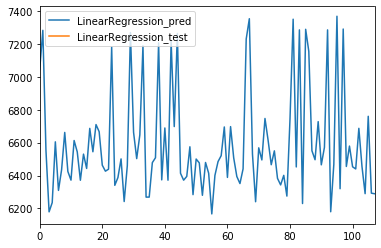

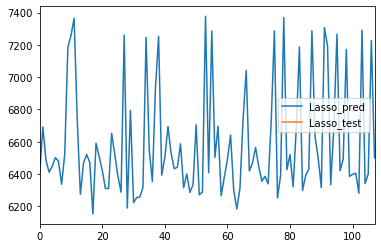

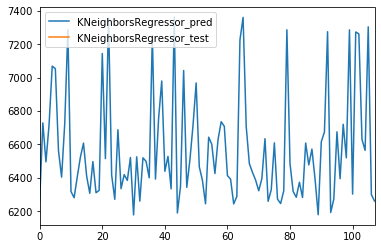

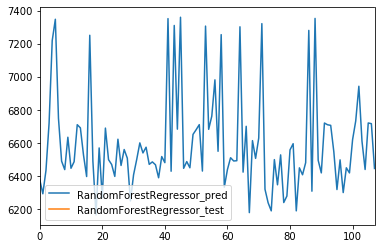

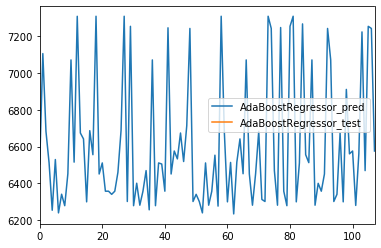

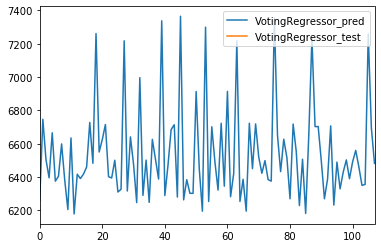

In [30]:
r2 = []
mse =[]

for model in models:
    pred_test = DataFrame()
    features_train, features_test, target_train, target_test = train_test_split(scale_features, target['predict_5'])
    model.fit(features_train, target_train)
    target_pred = model.predict(features_test)
    pred_test[model.__class__.__name__ + '_pred'] = target_pred[1::100]
    pred_test[model.__class__.__name__ + '_test'] = target_test[1::100]
    pred_test.plot.line()
    r2.append(r2_score(target_test, target_pred))
    
    mse.append(mean_squared_error(target_test, target_pred))
# print(r2, mse)
results['r2'] = Series(r2, index=results.index)
results['mse'] =Series(mse, index=results.index)
results

In [12]:
Series(r2, index=results.index)

name
LinearRegression         0.999358
Lasso                    0.999255
KNeighborsRegressor      0.995040
RandomForestRegressor    0.999574
AdaBoostRegressor        0.990096
VotingRegressor          0.998910
dtype: float64

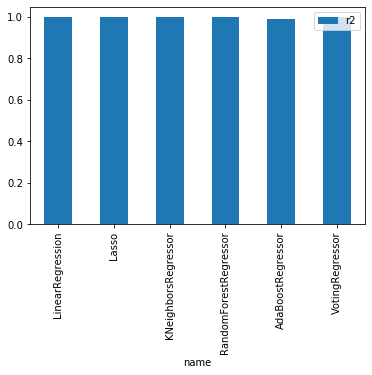

In [23]:
results[['r2']].plot.bar()